In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pathlib import Path

%matplotlib inline

In [2]:
#Creating a path to the files

csvpathwhale = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/whale_returns.csv")
csvpathalgo = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/algo_returns.csv")
csvpathl = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/l_historical.csv")
csvpathotex = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/otex_historical.csv")
csvpathshop = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/shop_historical.csv")
csvpathspts = Path("C:/Users/ritvi/OneDrive/Documents/# UofT FinTech Course/Starter_Code/Resources/sp_tsx_history.csv")

In [3]:
#Reading the CSV files into a DataFrame using Pandas

whale_dataframe = pd.read_csv(csvpathwhale, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_dataframe = pd.read_csv(csvpathalgo, index_col="Date", parse_dates=True, infer_datetime_format=True)
l_dataframe = pd.read_csv(csvpathl, index_col="Date", parse_dates=True, infer_datetime_format=True)
otex_dataframe = pd.read_csv(csvpathotex, index_col="Date", parse_dates=True, infer_datetime_format=True)
shop_dataframe = pd.read_csv(csvpathshop, index_col="Date", parse_dates=True, infer_datetime_format=True)
sptsx_dataframe = pd.read_csv(csvpathspts, index_col="Date", parse_dates=True, infer_datetime_format=True)

In [4]:
#Identifying number of null values for whales
whale_dataframe.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
#Identifying number of null values for algo
algo_dataframe.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [6]:
sptsx_dataframe.isnull().sum()

Close    0
dtype: int64

In [7]:
#Filling null data with 0
whale_dataframe = whale_dataframe.fillna(0)
algo_dataframe = algo_dataframe.fillna(0)

In [8]:
#Removing non-numeric values
sptsx_dataframe["Close"] = sptsx_dataframe["Close"].str.replace("$", "")
sptsx_dataframe["Close"] = sptsx_dataframe["Close"].str.replace(",", "")
sptsx_dataframe["Close"]

#Converting string to float
sptsx_dataframe["Close"] = sptsx_dataframe["Close"].astype("float")

C:\Users\ritvi\AppData\Local\Temp\ipykernel_12456\2437367917.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sptsx_dataframe["Close"] = sptsx_dataframe["Close"].str.replace("$", "")


In [9]:
#Converting closing prices to daily returns
sptsx_dailyreturns = sptsx_dataframe.pct_change()

#Removing new null values
sptsx_dailyreturns = sptsx_dailyreturns.fillna(0)
sptsx_dailyreturns.head()

,Close
Date,
2012-10-01,0.000000
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [10]:
#Joining Returns of whales, algomrithmic returns, and S&P TSX returns
dailyreturns_dataframe = pd.concat([whale_dataframe, algo_dataframe, sptsx_dailyreturns], axis="columns", join="inner")
dailyreturns_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,Close
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


In [11]:
#Rename Column

dailyreturns_dataframe.rename(columns = {"Close":"SPTSX"}, inplace = True)
dailyreturns_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2015-03-02,0.000000,0.000000,0.000000,0.000000,-0.008158,0.003200,0.001950
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972


In [12]:
#Describing the data
dailyreturns_dataframe.describe()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,0.000141,-0.000241,-0.000099,0.000377,0.000704,0.000211,0.000088
std,0.007824,0.006979,0.010877,0.012819,0.007590,0.008323,0.007031
min,-0.032711,-0.032099,-0.139820,-0.066505,-0.030951,-0.036937,-0.031241
25%,-0.003658,-0.004034,-0.004776,-0.005722,-0.003141,-0.003878,-0.003665
50%,0.000524,0.000000,0.000290,0.000626,0.000139,0.000643,0.000596
75%,0.004329,0.003613,0.005304,0.007503,0.004034,0.005249,0.004235
max,0.029881,0.027032,0.080705,0.061341,0.050735,0.030509,0.029389


<AxesSubplot:xlabel='Date'>

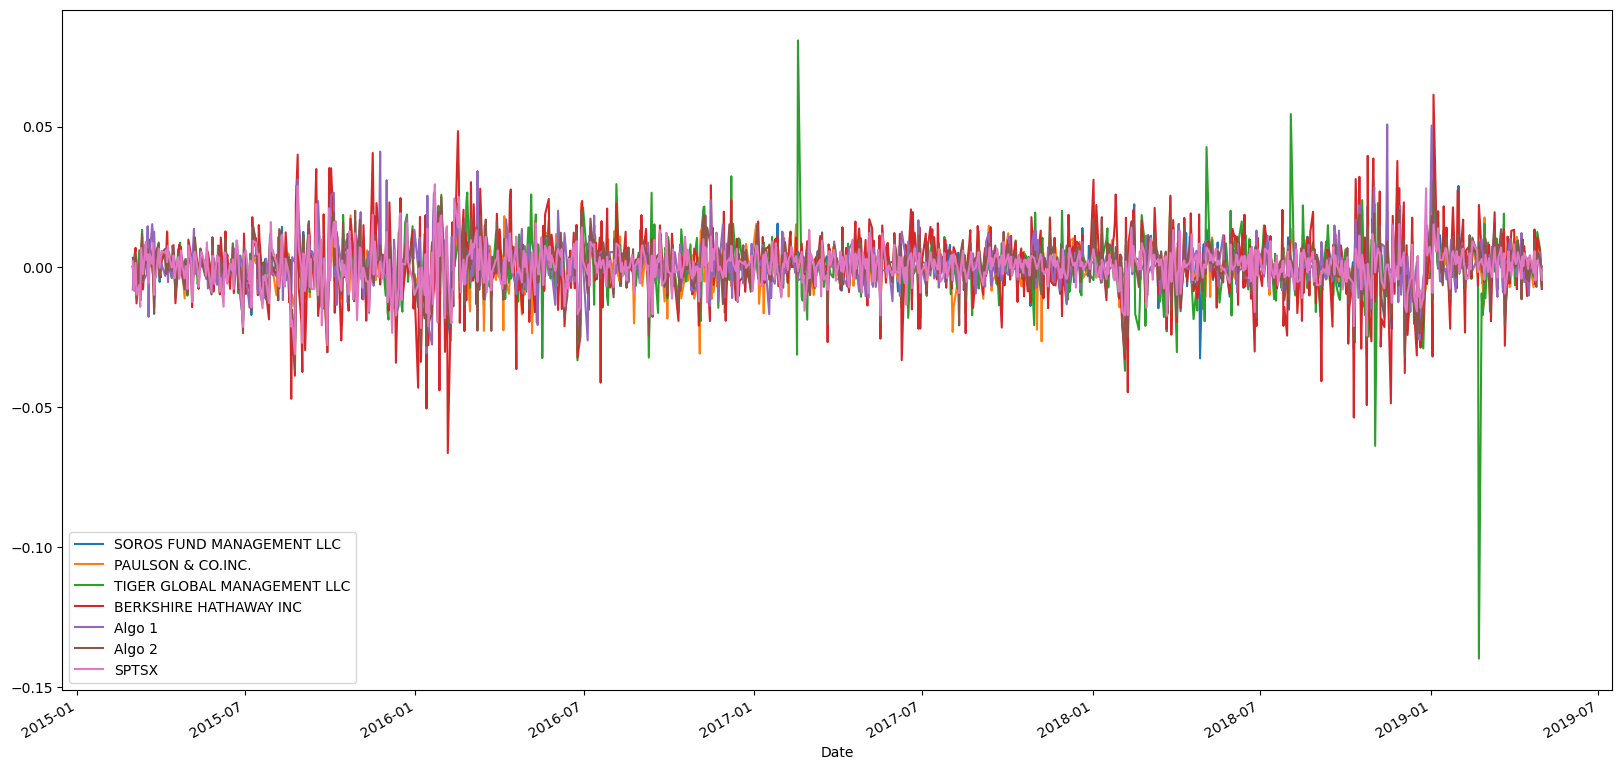

In [13]:
#Plotting daily returns
dailyreturns_dataframe.plot(figsize = (20,10))

In [14]:
#Calculating Cumulative Returns
cumulative_dataframe = (1 + dailyreturns_dataframe).cumprod()
cumulative_dataframe.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2015-03-02,1.000000,1.000000,1.000000,1.000000,0.991842,1.003200,1.001950
2015-03-03,0.998734,0.995019,0.999504,0.993431,0.989916,1.002247,0.993404
2015-03-04,1.000962,0.998245,0.996972,0.997617,0.981414,1.004669,0.990055
2015-03-05,1.004981,1.002314,0.999319,1.004327,0.980476,1.009012,0.991386
2015-03-06,0.997037,0.998731,0.990844,0.991172,0.975616,0.997449,0.981500


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
Date,,,,,,,
2019-05-01,1.120637,0.761096,0.848958,1.354361,2.005371,1.199152,1.067845


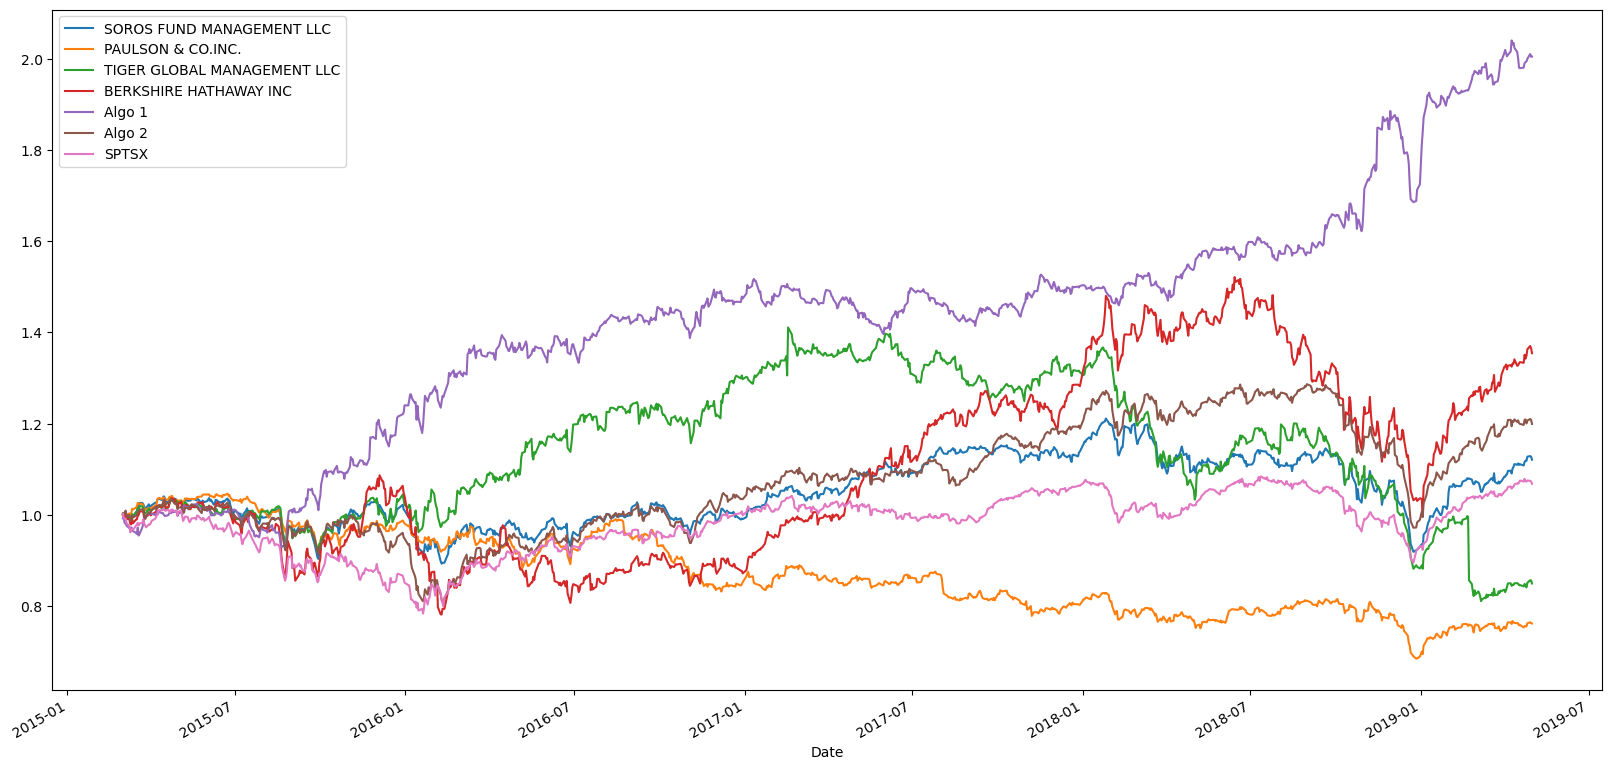

In [15]:
#Plotting Cumulative Returns
cumulative_dataframe.plot(figsize = (20,10))

#Portfolios that outperform S&P TSX
higher_cumulative_dataframe = cumulative_dataframe.tail(1)
higher_cumulative_dataframe.head()

In [16]:
print(f"Soros fund, Berkshire Hathaway, Algo 1, and Algo 2 have greater returns than S&P TSX Composite")

Soros fund, Berkshire Hathaway, Algo 1, and Algo 2 have greater returns than S&P TSX Composite


<AxesSubplot:>

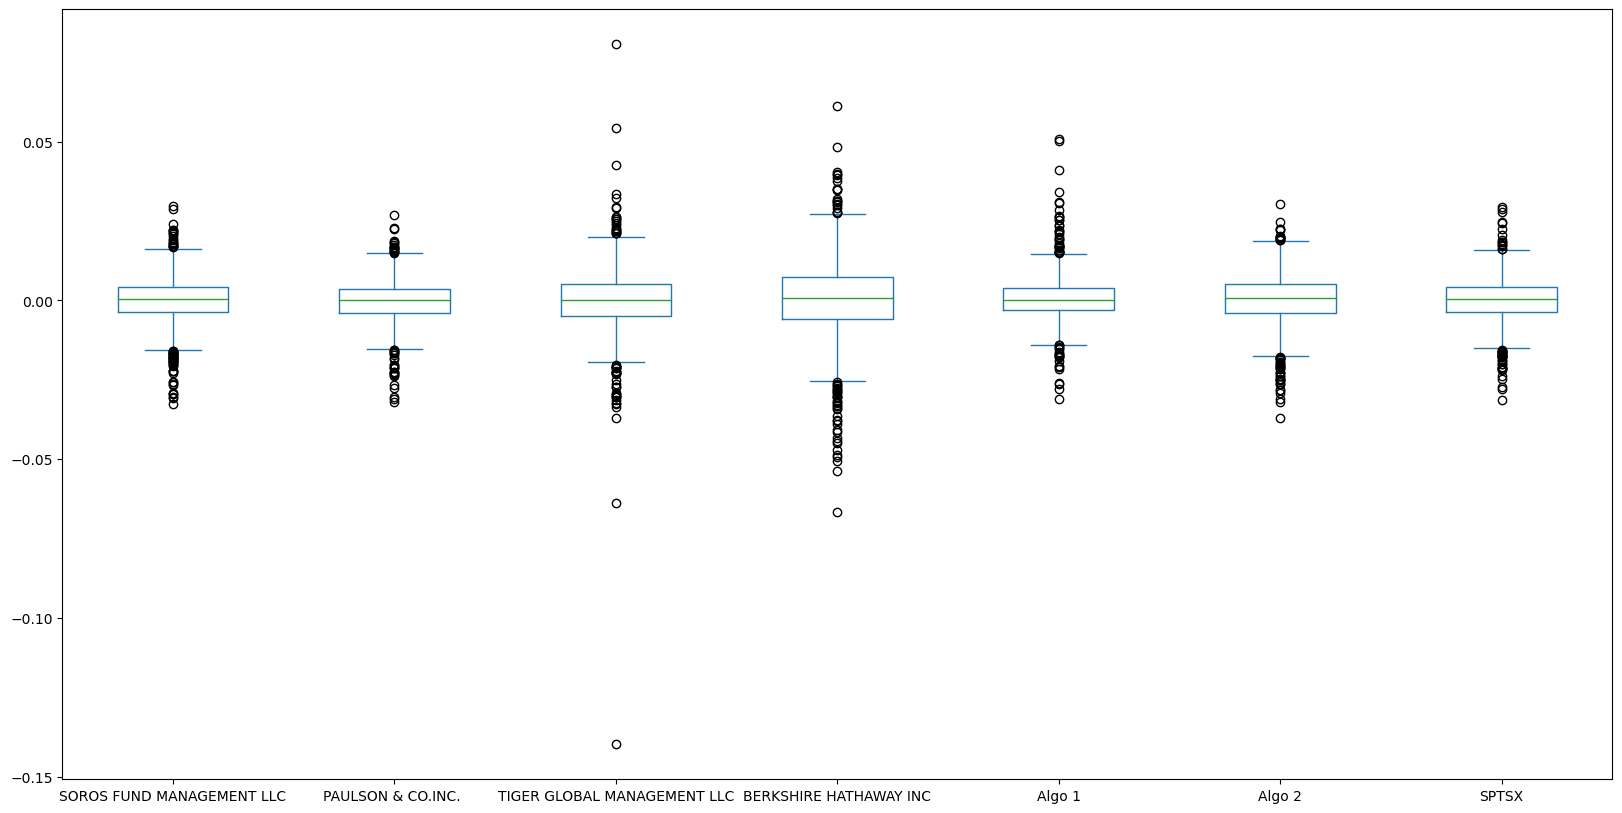

In [17]:
#Creating a box plot
dailyreturns_dataframe.plot(kind = "box", figsize = (20,10))

In [18]:
#Calculating Daily Standard Deviation for all portfolios
daily_std = dailyreturns_dataframe.std().sort_values(ascending=False)
daily_std

BERKSHIRE HATHAWAY INC         0.012819
TIGER GLOBAL MANAGEMENT LLC    0.010877
Algo 2                         0.008323
SOROS FUND MANAGEMENT LLC      0.007824
Algo 1                         0.007590
SPTSX                          0.007031
PAULSON & CO.INC.              0.006979
dtype: float64

In [19]:
print(f"All portfolios except Paulson & Co. Inc. are riskier than the S&P 500")

All portfolios except Paulson & Co. Inc. are riskier than the S&P 500


In [20]:
#Calculating Annualized Standard Deviation
daily_std_annual = daily_std*np.sqrt(252)
daily_std_annual

BERKSHIRE HATHAWAY INC         0.203500
TIGER GLOBAL MANAGEMENT LLC    0.172675
Algo 2                         0.132121
SOROS FUND MANAGEMENT LLC      0.124199
Algo 1                         0.120491
SPTSX                          0.111613
PAULSON & CO.INC.              0.110787
dtype: float64

<AxesSubplot:xlabel='Date'>

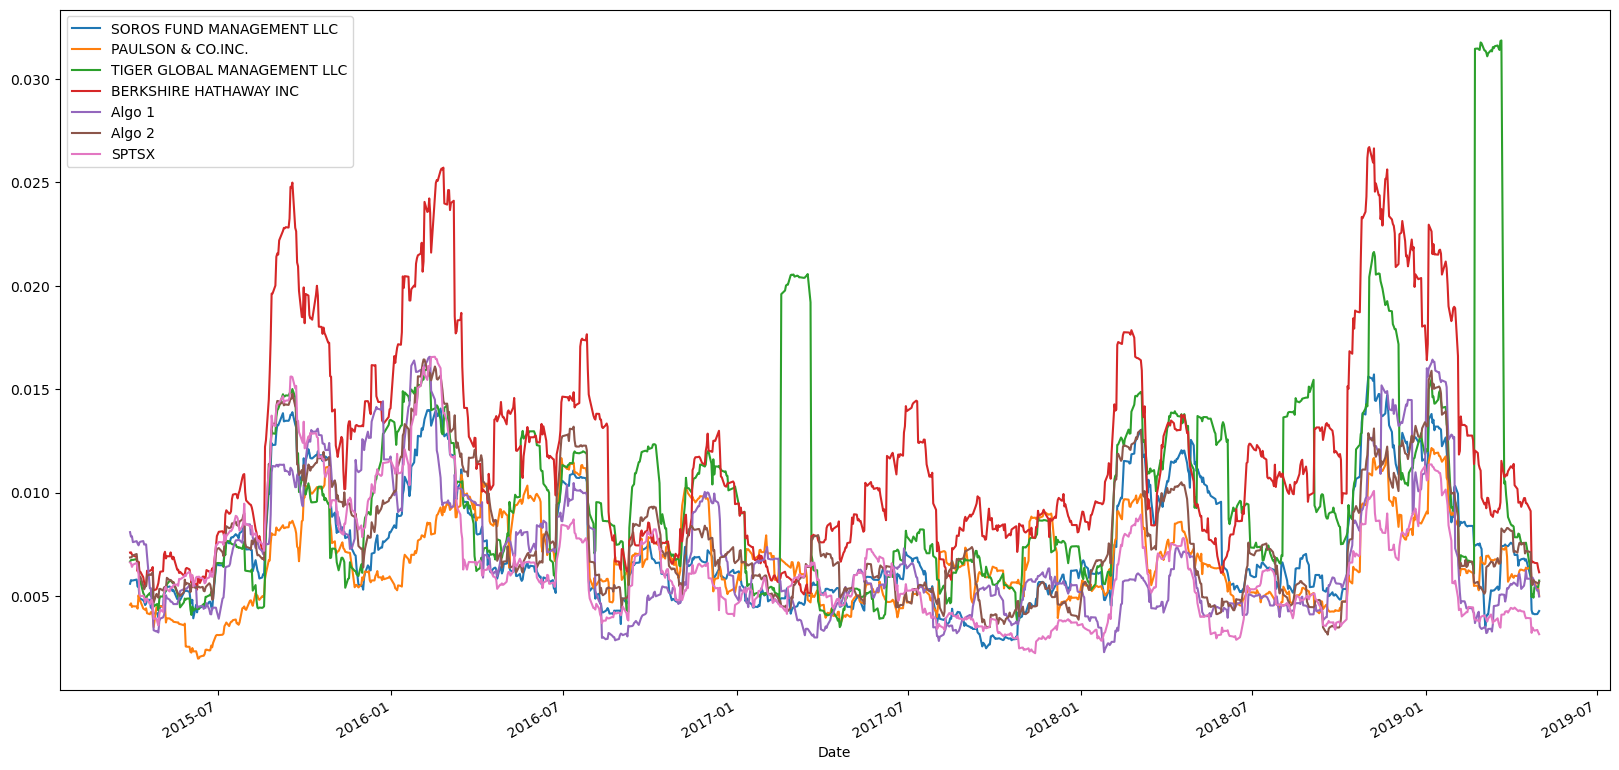

In [21]:
#Calculating and plotting rolling standard deviation
daily_rolling_std = dailyreturns_dataframe.rolling(window = 21).std()
daily_rolling_std.plot(figsize = (20,10))

In [22]:
#Calculating Correlation
Daily_Correlation = dailyreturns_dataframe.corr()
Daily_Correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
SOROS FUND MANAGEMENT LLC,1.000000,0.697074,0.560963,0.750181,0.313607,0.826609,0.673902
PAULSON & CO.INC.,0.697074,1.000000,0.433034,0.540031,0.266147,0.673984,0.486503
TIGER GLOBAL MANAGEMENT LLC,0.560963,0.433034,1.000000,0.423524,0.161119,0.506660,0.440571
BERKSHIRE HATHAWAY INC,0.750181,0.540031,0.423524,1.000000,0.289220,0.684556,0.557224
Algo 1,0.313607,0.266147,0.161119,0.289220,1.000000,0.284840,0.309759
Algo 2,0.826609,0.673984,0.506660,0.684556,0.284840,1.000000,0.737391
SPTSX,0.673902,0.486503,0.440571,0.557224,0.309759,0.737391,1.000000


<AxesSubplot:>

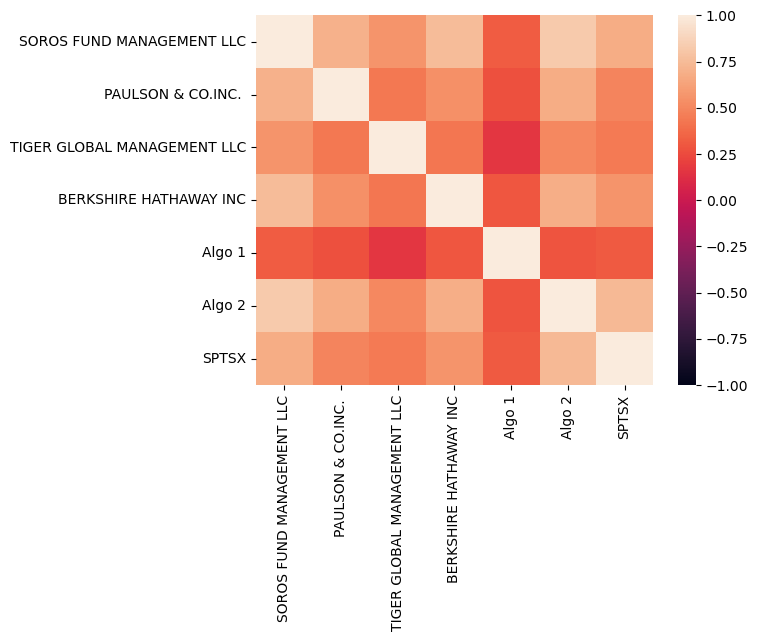

In [23]:
#Plotting Correlation
sns.heatmap(Daily_Correlation, vmin=-1, vmax=1)

<AxesSubplot:xlabel='SPTSX', ylabel='Algo 1'>

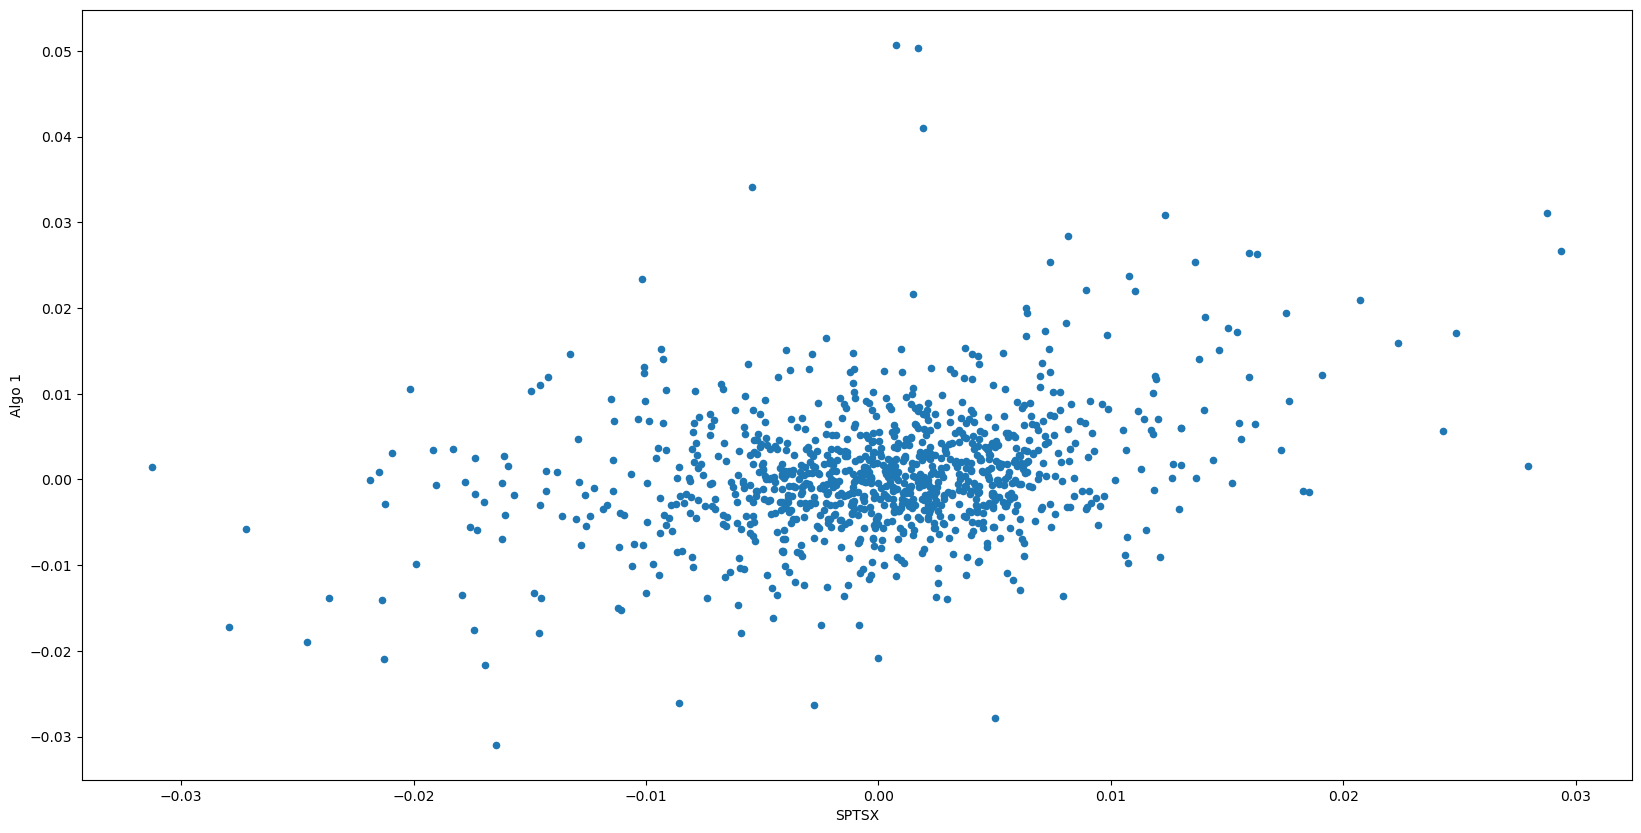

In [24]:
#Plotting correlaiton between S&P TSX and Algo 1
dailyreturns_dataframe.plot(kind="scatter", y = "Algo 1", x = "SPTSX", figsize = (20,10))

<AxesSubplot:title={'center':'Rolling 60-day beta of Algo 2'}, xlabel='Date'>

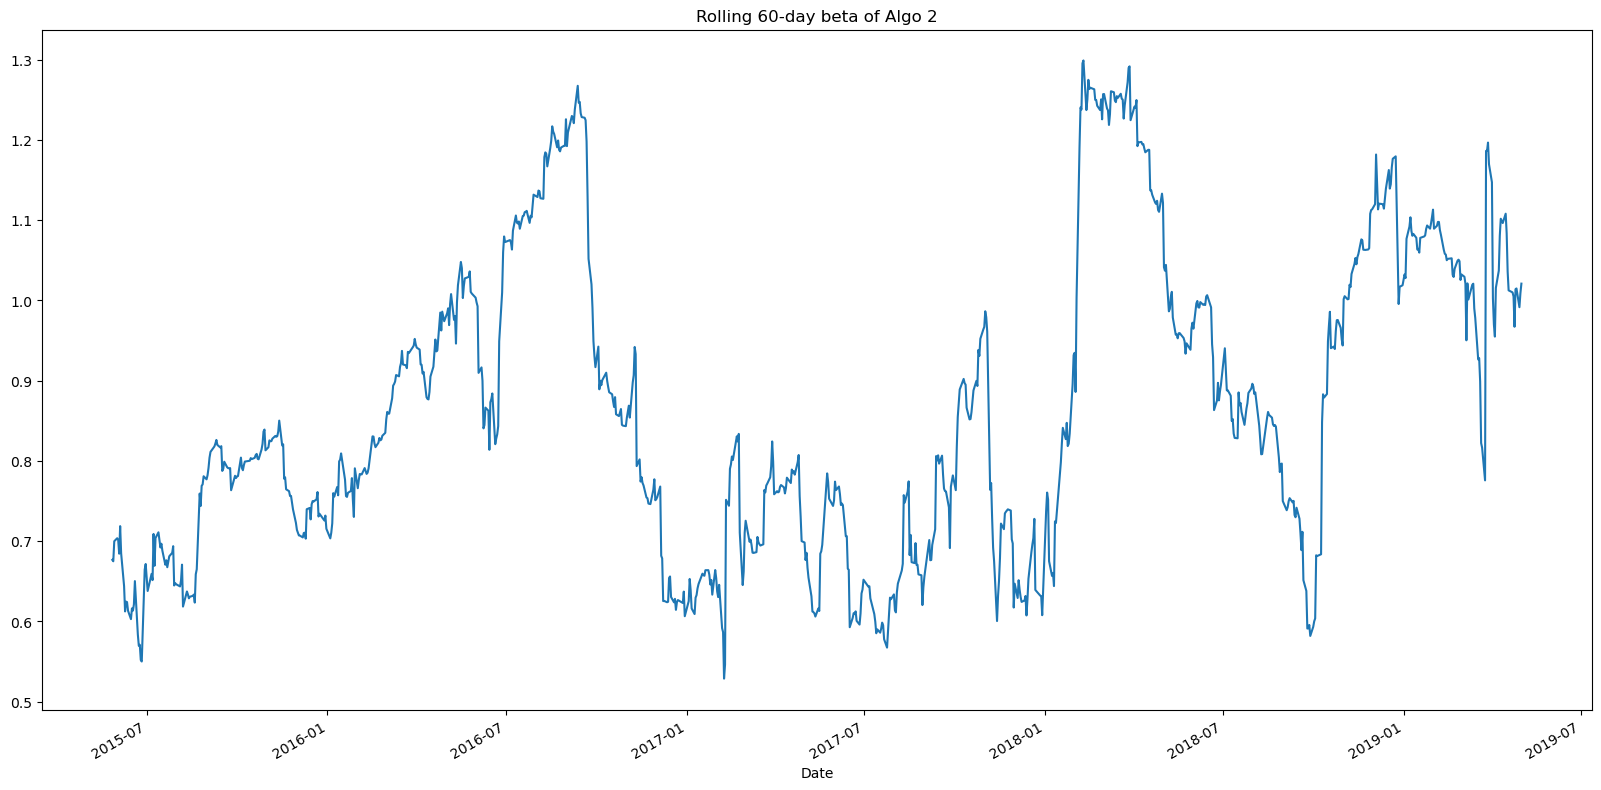

In [25]:
#Calculating 60-day rolling beta
rolling_covariance = dailyreturns_dataframe['Algo 2'].rolling(window=60).cov(dailyreturns_dataframe['SPTSX'])
rolling_variance = dailyreturns_dataframe['SPTSX'].rolling(window=60).var()
rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20,10), title = 'Rolling 60-day beta of Algo 2')

<AxesSubplot:xlabel='Date'>

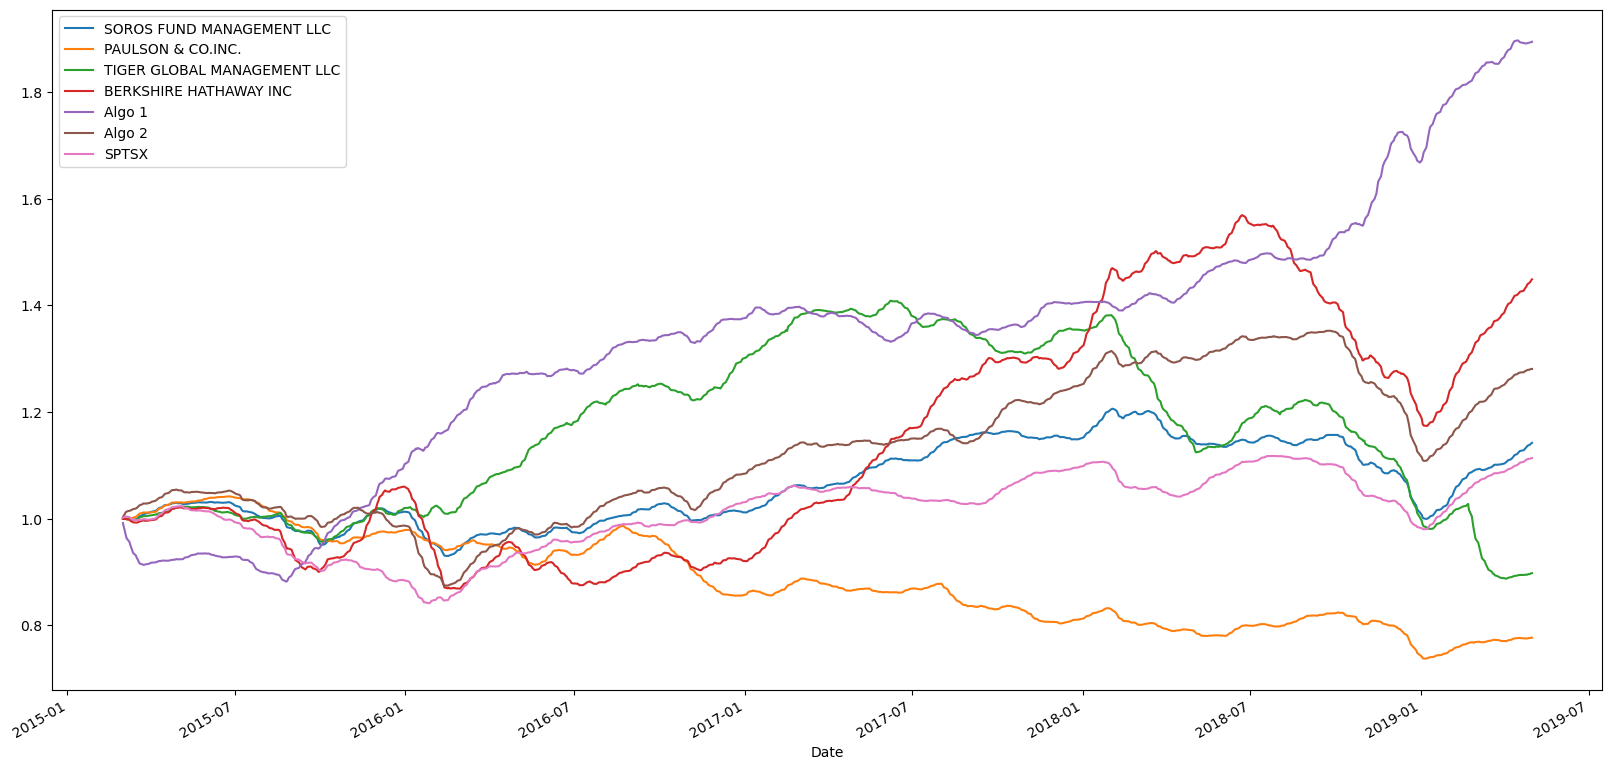

In [26]:
#Calculating Exponentionally Weighted Average
daily_ewm = dailyreturns_dataframe.ewm(span = 21, adjust = False).mean()
(1+daily_ewm).cumprod().plot(figsize = (20,10))

In [27]:
#Calculating Sharpe Ratios
sharpe_ratios = (dailyreturns_dataframe.mean()*252)/(dailyreturns_dataframe.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286570
PAULSON & CO.INC.             -0.547328
TIGER GLOBAL MANAGEMENT LLC   -0.144385
BERKSHIRE HATHAWAY INC         0.466818
Algo 1                         1.473237
Algo 2                         0.402526
SPTSX                          0.199724
dtype: float64

<AxesSubplot:title={'center':'Sharpre Ratios'}>

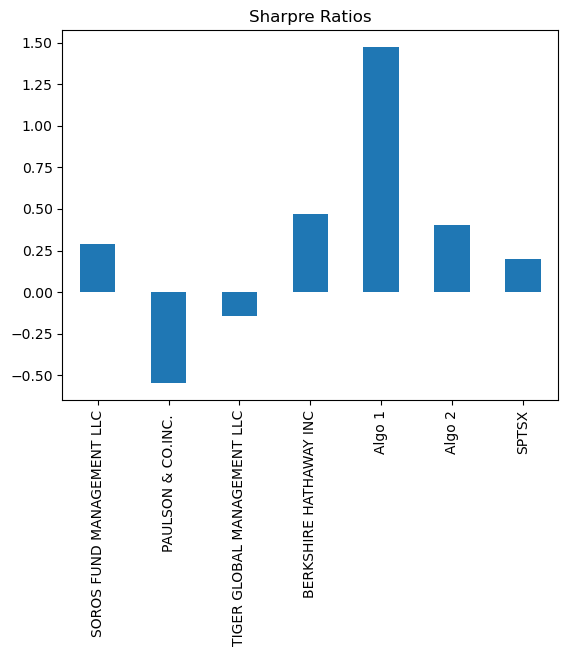

In [28]:
#Plotting Sharpe Ratios
sharpe_ratios.plot(kind="bar", title="Sharpre Ratios")

In [29]:
#Cleaning Otex data frame
otex_dataframe.rename(columns = {"Close":"otex"}, inplace = True)
otex_dataframe.drop("Symbol", inplace = True, axis=1)
otex_dataframe.head()

,otex
Date,
2018-01-02,43.58
2018-01-03,43.07
2018-01-04,42.91
2018-01-05,42.57
2018-01-08,42.16


In [30]:
#Cleaning L data frame
l_dataframe.rename(columns = {"Close":"l"}, inplace = True)
l_dataframe.drop("Symbol", inplace = True, axis=1)
l_dataframe.head()

,l
Date,
2018-01-02,57.99
2018-01-03,57.41
2018-01-04,57.42
2018-01-05,57.42
2018-01-08,56.86


In [31]:
#Cleaning shop data frame
shop_dataframe.rename(columns = {"Close":"shop"}, inplace = True)
shop_dataframe.drop("Symbol", inplace = True, axis=1)
shop_dataframe.head()

,shop
Date,
2018-01-02,132.06
2018-01-03,135.15
2018-01-04,137.46
2018-01-05,137.26
2018-01-08,139.51


In [32]:
#Concatenating all stocks to one data frame
portfolio = pd.concat((otex_dataframe, l_dataframe, shop_dataframe), axis = 1, join = "inner")
portfolio.head()

,otex,l,shop
Date,,,
2018-01-02,43.58,57.99,132.06
2018-01-03,43.07,57.41,135.15
2018-01-04,42.91,57.42,137.46
2018-01-05,42.57,57.42,137.26
2018-01-08,42.16,56.86,139.51


In [33]:
#Calculating Daily Returns
daily_portfolio = portfolio.pct_change()
daily_portfolio = daily_portfolio.fillna(0)
daily_portfolio.head()


,otex,l,shop
Date,,,
2018-01-02,0.000000,0.000000,0.000000
2018-01-03,-0.011703,-0.010002,0.023398
2018-01-04,-0.003715,0.000174,0.017092
2018-01-05,-0.007924,0.000000,-0.001455
2018-01-08,-0.009631,-0.009753,0.016392


In [34]:
#Calculating weighted returns assuming equal number of shares for each stock
weights = [1/3, 1/3, 1/3]
portfolio_returns_stocks = daily_portfolio.dot(weights)


In [35]:
#Concatanating my portfolio with dataframe of other portfolios
portfolio_returns = pd.concat((portfolio_returns_stocks, dailyreturns_dataframe), axis = 1, join = "inner")
portfolio_returns.rename(columns = {0:"My Portfolio"}, inplace = True)
portfolio_returns.describe()

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,0.001389,-0.000007,-0.000134,-0.001225,0.000271,0.000907,0.000064,0.000033
std,0.014111,0.009198,0.007241,0.013828,0.014407,0.007550,0.008711,0.006244
min,-0.060284,-0.032711,-0.032099,-0.139820,-0.053816,-0.026095,-0.031953,-0.024602
25%,-0.006572,-0.004628,-0.004368,-0.007242,-0.006178,-0.002782,-0.003805,-0.003156
50%,0.002920,0.000758,0.000000,0.000000,0.000917,0.000155,0.000831,0.000612
75%,0.009524,0.005143,0.004416,0.005965,0.007576,0.003645,0.005307,0.004145
max,0.053237,0.029881,0.027032,0.054425,0.061341,0.050735,0.030509,0.027940


<AxesSubplot:xlabel='Date'>

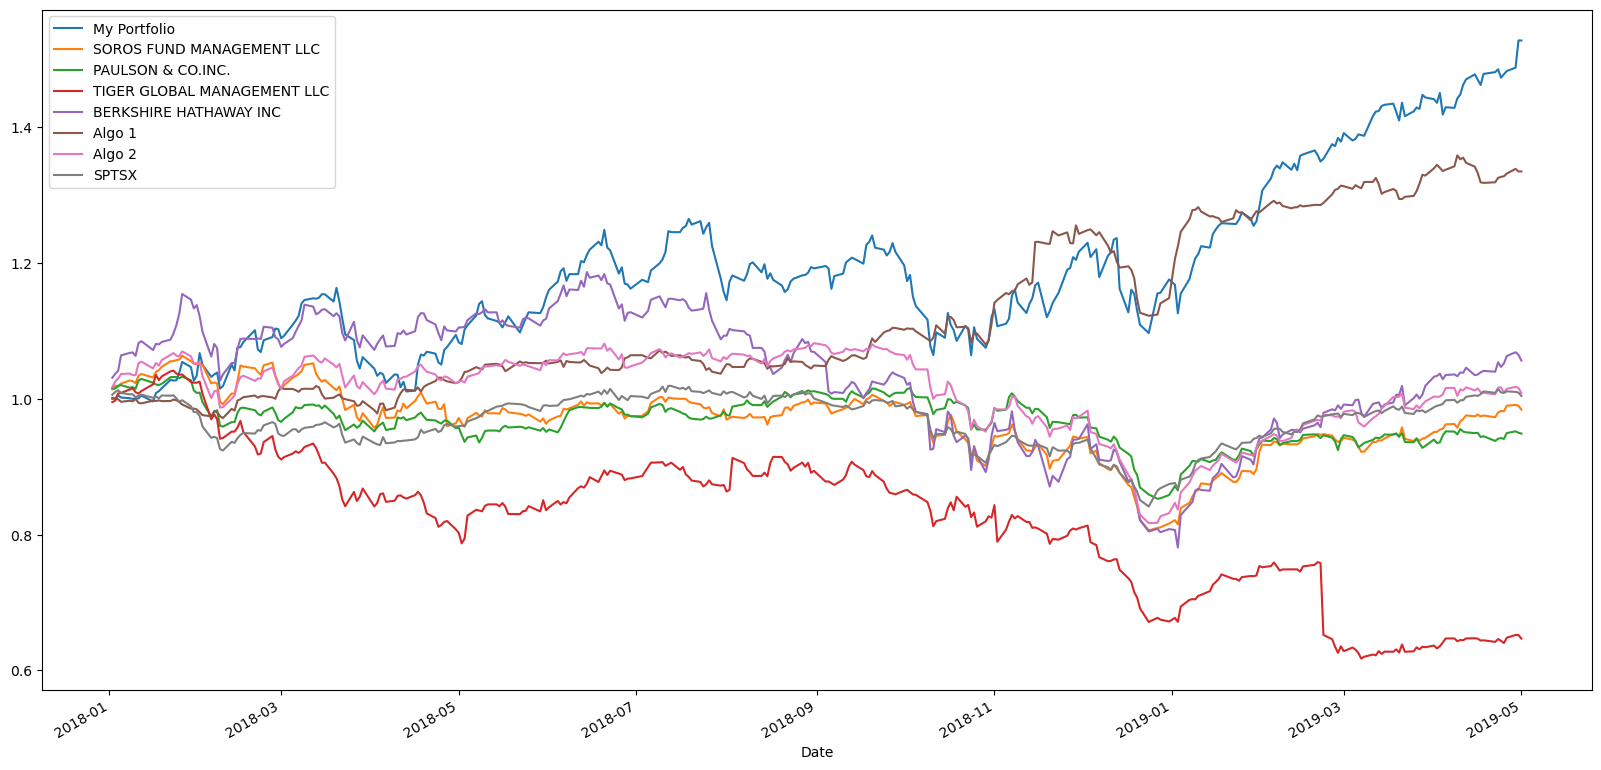

In [36]:
#Calculating Cumulative Returns
cumulative_dataframe_portfolio = (1 + portfolio_returns).cumprod()
cumulative_dataframe_portfolio.head()

#Plotting Cumulative Returns
cumulative_dataframe_portfolio.plot(figsize = (20,10))

In [37]:
#Calculating annualised Standard deviation
daily_std_portfolio = portfolio_returns.std().sort_values(ascending=False)
daily_std_annual_portfolio = daily_std_portfolio*np.sqrt(252)
daily_std_annual_portfolio

BERKSHIRE HATHAWAY INC         0.228696
My Portfolio                   0.224007
TIGER GLOBAL MANAGEMENT LLC    0.219519
SOROS FUND MANAGEMENT LLC      0.146012
Algo 2                         0.138277
Algo 1                         0.119845
PAULSON & CO.INC.              0.114944
SPTSX                          0.099119
dtype: float64

<AxesSubplot:xlabel='Date'>

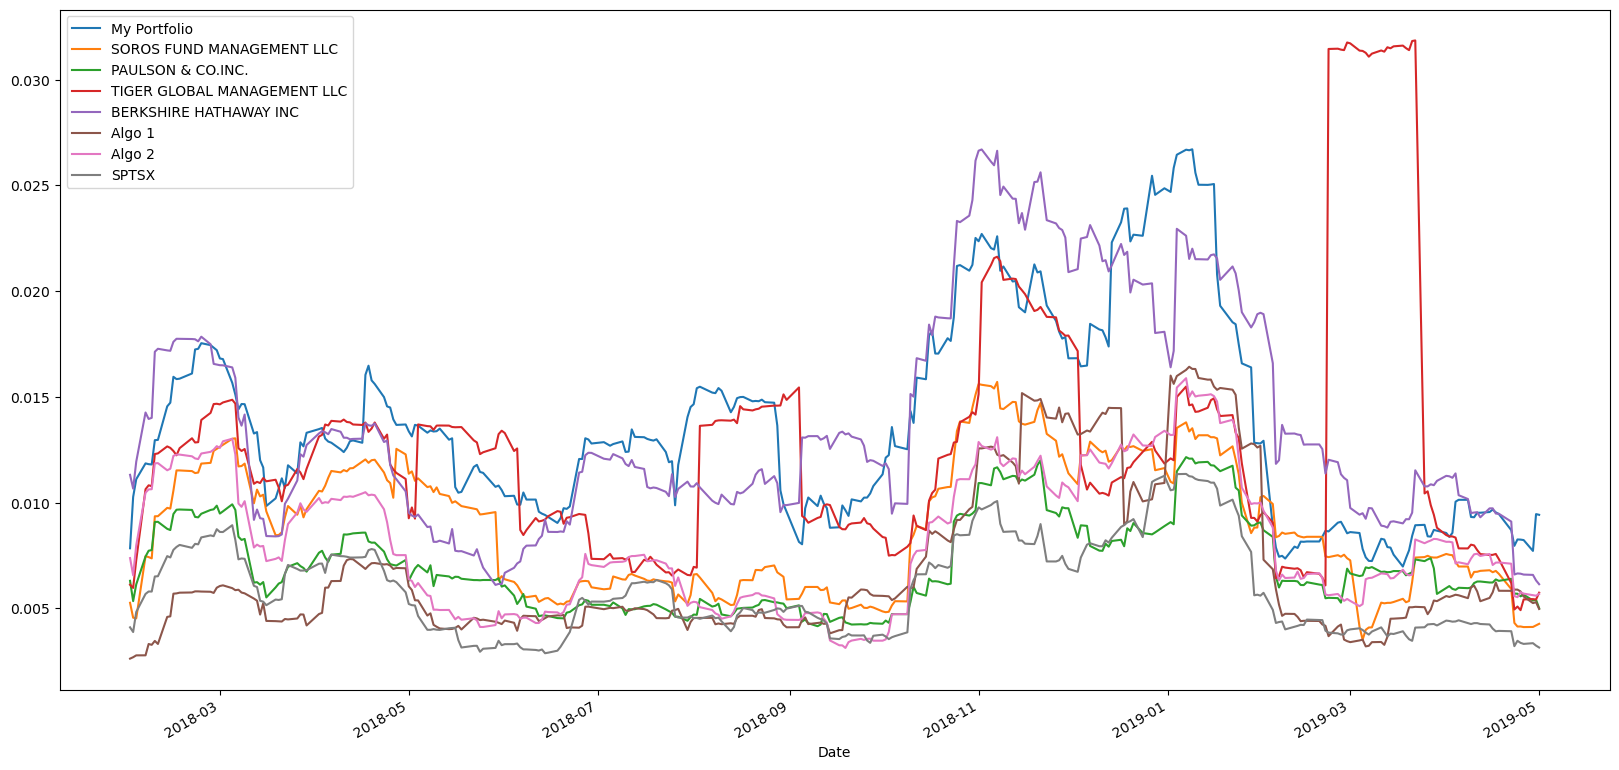

In [38]:
#Calculating and plotting rolling standard deviation with a 21-day window
daily_rolling_std_portfolio = portfolio_returns.rolling(window = 21).std()
daily_rolling_std_portfolio.plot(figsize = (20,10))

In [39]:
#Calculating correlation
Daily_Correlation_portfolio = portfolio_returns.corr()
Daily_Correlation_portfolio

,My Portfolio,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SPTSX
My Portfolio,1.000000,0.553476,0.382071,0.304013,0.642237,0.214752,0.559801,0.578050
SOROS FUND MANAGEMENT LLC,0.553476,1.000000,0.766254,0.523392,0.784293,0.304575,0.835815,0.687815
PAULSON & CO.INC.,0.382071,0.766254,1.000000,0.531213,0.652229,0.318700,0.800032,0.624946
TIGER GLOBAL MANAGEMENT LLC,0.304013,0.523392,0.531213,1.000000,0.379911,0.130795,0.480772,0.437297
BERKSHIRE HATHAWAY INC,0.642237,0.784293,0.652229,0.379911,1.000000,0.292936,0.786008,0.650775
Algo 1,0.214752,0.304575,0.318700,0.130795,0.292936,1.000000,0.320198,0.284499
Algo 2,0.559801,0.835815,0.800032,0.480772,0.786008,0.320198,1.000000,0.754681
SPTSX,0.578050,0.687815,0.624946,0.437297,0.650775,0.284499,0.754681,1.000000


<AxesSubplot:>

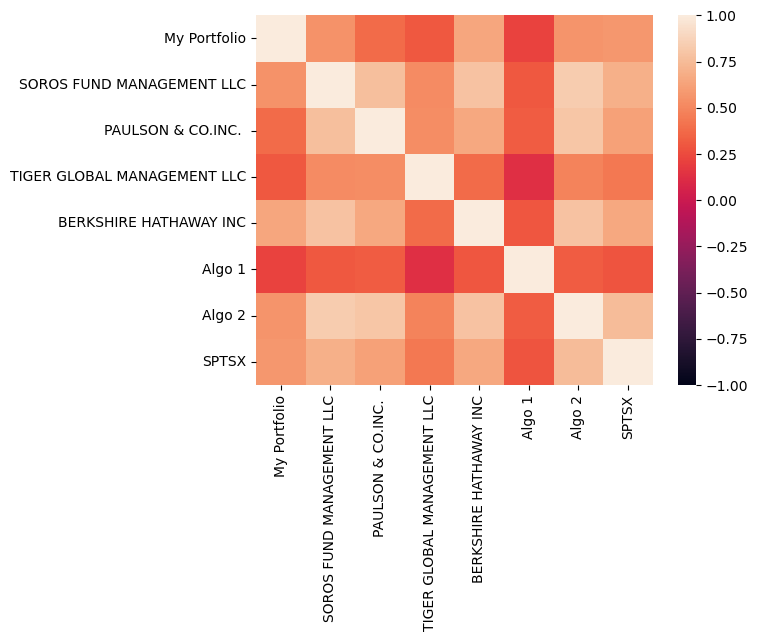

In [40]:
#Plotting Correlation
sns.heatmap(Daily_Correlation_portfolio, vmin=-1, vmax=1)

<AxesSubplot:xlabel='SPTSX', ylabel='My Portfolio'>

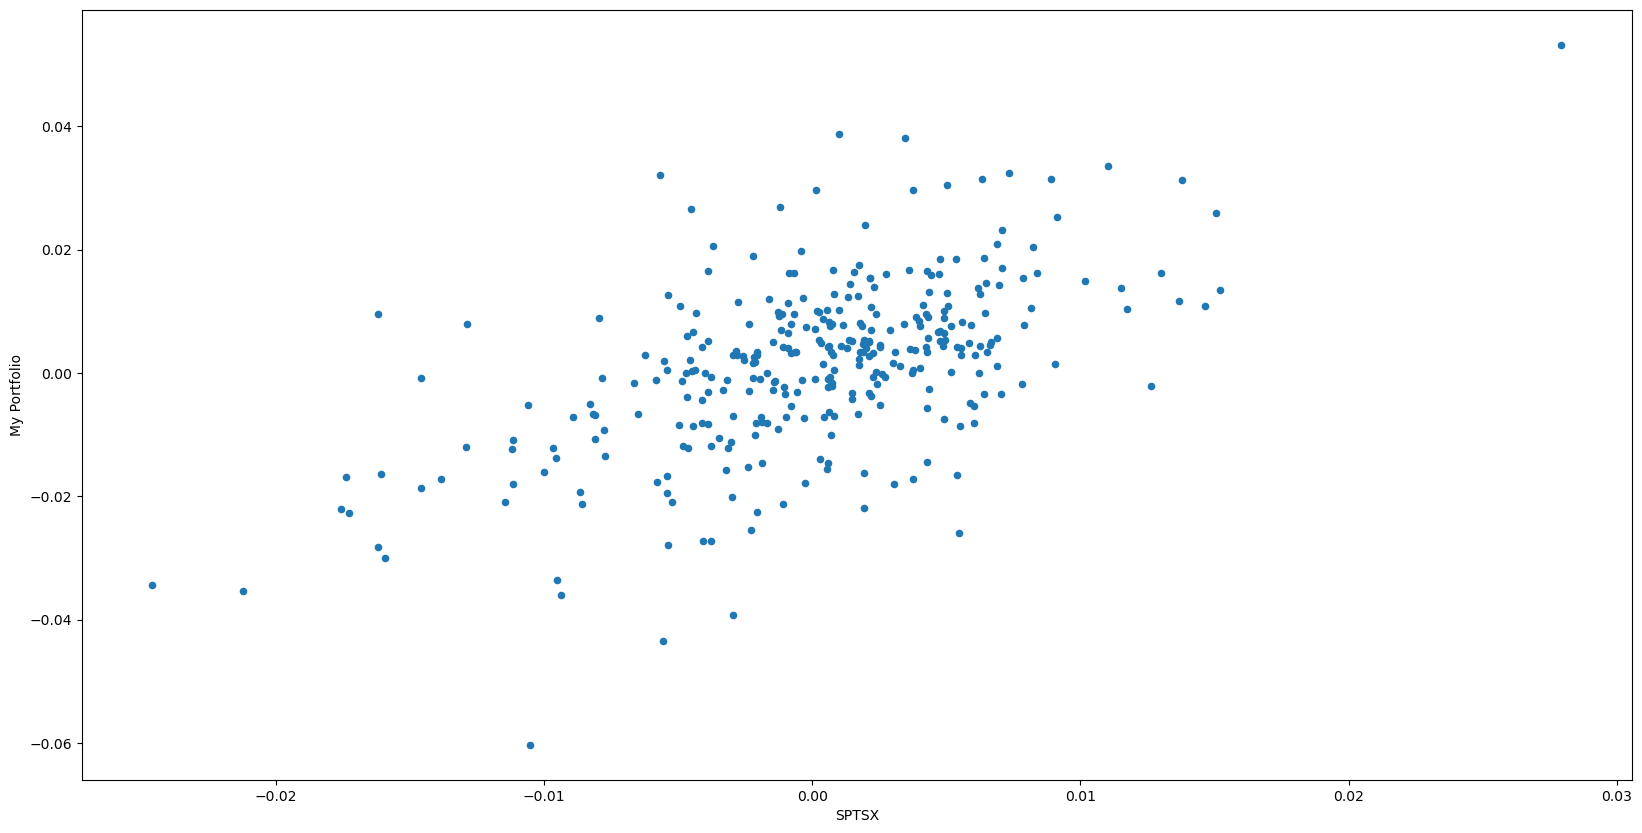

In [41]:
#Plotting correlaiton between S&P TSX and My Portfolio
portfolio_returns.plot(kind="scatter", y = "My Portfolio", x = "SPTSX", figsize = (20,10))

<AxesSubplot:title={'center':'Rolling 60-day beta of My Portfolio'}, xlabel='Date'>

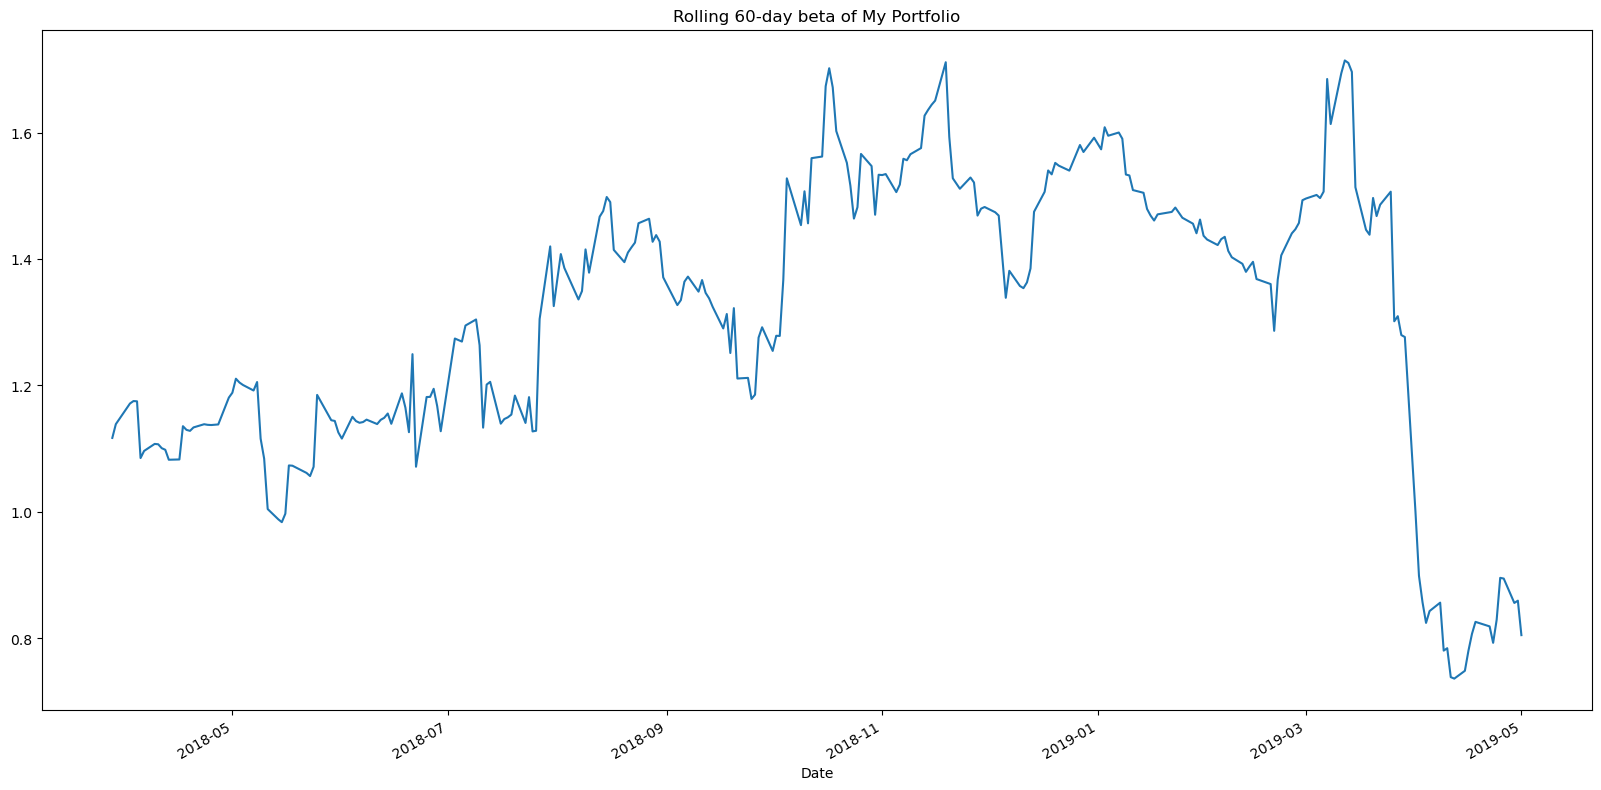

In [42]:
#Calculating and plotting 60-day rolling beta for portfolio
rolling_covariance_portfolio = portfolio_returns['My Portfolio'].rolling(window=60).cov(dailyreturns_dataframe['SPTSX'])
rolling_portfolio_beta = rolling_covariance_portfolio / rolling_variance
rolling_portfolio_beta.plot(figsize=(20,10), title = 'Rolling 60-day beta of My Portfolio')

In [43]:
print(r"My portfolio overall has the highest returns over any other portfolio as noted with cumulative returns above.")
print(r"")
print(r"But my potfolio also has one of the highest annualized standard deviation values for daily returns right after Berkshire Hathaway. My portfolio outperforms the market with one of the lowest betas compared to the market right after algo 1. This portfolio is suited for someone who is willing to take high risks but looking for high rewards as well")

My portfolio overall has the highest returns over any other portfolio as noted with cumulative returns above.

But my potfolio also has one of the highest annualized standard deviation values for daily returns right after Berkshire Hathaway. My portfolio outperforms the market with one of the lowest betas compared to the market right after algo 1. This portfolio is suited for someone who is willing to take high risks but looking for high rewards as well
